# Introduction

We've seen so far that `sympy` is pretty versatile in coming up with analytic solutions for Schrodinger's equation, and you might imagine that it's possible to use it even more broadly than we have (for example, to take care of the boundary condition matching we've done with the finite square well and delta-function potentials). Sometimes, though, it just isn't possible to get a nice, closed-form, analytic solution to Schrodinger's equation. In that situation, we need to go numerical.

Of course, that brings us to a problem: the equation (and therefore the solution) is dependent on the energy, and only certain energies are allowed. In the analytic case, we found the general solution and then used boundary conditions to constrain that solution to particular energies. Clearly, that approach won't work if we're trying to solve numerically. So, we have to retreat to an old standby: guess and check.

Actually, we're going to be a bit more systematic than the last paragraph would suggest. It is true that we will be guessing and checking, but we will use the results of each guess to improve our next guess, and that will lead us to the allowed energies with as much precision as we might want. The name for this approach is *Shooting*.

Any shooting method has three parts:
  * Given a guess at the eigenvalue, solve the ODE and check to see how well this solution matches the boundary conditions
  * Given one or more previous guesses, come up with our next (improved) guess
  * Get the ball rolling with an initial guess
  
Additionally, if we want to find a whole spectrum of allowed energies, we'd like to be able to move from one to the next automatically, but that's a refinement that isn't, strictly speaking, necessary.

We'll start with solving the ODE. We'll use the finite square well as our potential; you're asked to go through the simple harmonic oscillator and the infinite square well as part of the homework.

----

## Solving ODEs

The primary tool we will use to numerically solve ODEs is the `odeint` routine in the `scipy.integrate` module. We will also need to use a number of functions included in the `numpy` library, so we'll import it, as well.


In [1]:
import numpy as np
from scipy.integrate import odeint


In [2]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t0, ...)
    
    where y can be a vector.
    
    *Note*: The first two arguments of ``func(y, t0, ...)`` are in the
    opposite order of the arguments in the system definition function used
    by the `scipy.integrate.ode` class.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        

There's a lot to unpack here, but for our purposes, it's enough to know that we have to provide a python function that will give us the right hand side of the ODE, and we need to specify the domain of the integration (called `t` in the documentation).

#### Aside: Initial value vs. Boundary value problems

One of the ways to categorize ODEs is related to how boundary conditions are applied. If you have conditions on both ends (which is our case with the Schrodinger equation), it's called a boundary value problem; if you have boundary conditions on one end, it's called an initial value problem. IVPs are common in the case where you have time evolution of some quantity: you know what the initial conditions are, but it doesn't (usually) make sense to talk about a final condition.  Numerical methods *do* exist for BVPs, but `odeint` is not one of them. The shooting method is a way of using an IVP solver to solve a BVP. Why do this? It turns out that BVP solvers tend to be more complicated and more computationally expensive than IVP solvers, so shooting is an easier entry into solving BVPs.



In [3]:
a = 1.0
V0 = 20.0

x = np.linspace(0, 3*a, 200)

def func(y, x, E, a=a, V0=V0):
    """Right hand side for the Schrodinger equation (finite square well).
    
    defined for positive x; since we have symmetry, we'll go from the center out.
    Energies are in eV, a is the width in nanometers
    """
    hbar = 197.4 # eV nm/c
    m = .511e6 # eV/c^2; an electron
    
    psi, psiprime = y
    
    if x < a:
        psidoubleprime = -2*m/hbar**2 * (E + V0)*psi
    else:
        psidoubleprime = -2*m/hbar**2 * E * psi
    
    return psiprime, psidoubleprime

In [5]:
y0 = (1.0, 0.0)

result = odeint(func, y0, x, args=(-19.0,))

In [6]:
from matplotlib import pyplot as plt

In [7]:
%matplotlib inline

In [8]:
result.shape

(200, 2)

In [9]:
psi = result[:,0]

In [10]:
psiprime = result[:,1]

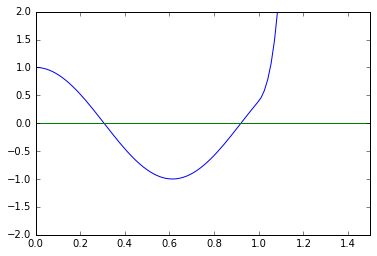

In [17]:
plt.plot(x, psi)
plt.xlim(0,1.5)
plt.ylim(-2,2)
plt.plot(x,np.zeros_like(x))

### Doing it by hand

Now that we can integrate the ODE, we could apply the shooting method by hand, at least to get a rough idea. The energy we tried above is obviously too high. Let's try something a little lower.

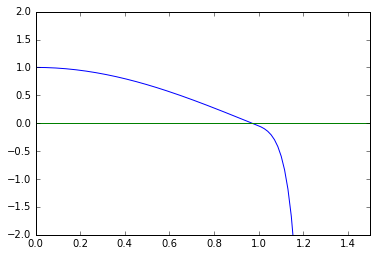

In [18]:
y0 = (1.0, 0.0)

result = odeint(func, y0, x, args=(-19.9,))
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.5)
plt.ylim(-2,2)
plt.plot(x,np.zeros_like(x))

We went too far. Let's split the difference, and continue doing so until we get close enough.

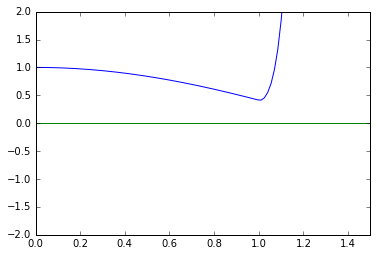

In [20]:
y0 = (1.0, 0.0)

result = odeint(func, y0, x, args=(-19.95,))
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.5)
plt.ylim(-2,2)
plt.plot(x,np.zeros_like(x))

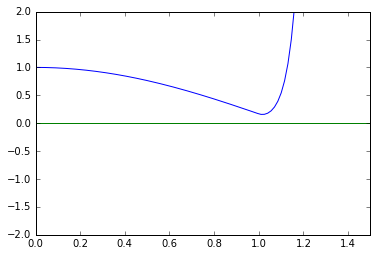

In [21]:
result = odeint(func, y0, x, args=(-19.925,))
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.5)
plt.ylim(-2,2)
plt.plot(x,np.zeros_like(x))

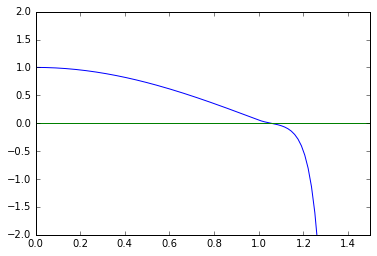

In [23]:
result = odeint(func, y0, x, args=(-19.9125,))
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.5)
plt.ylim(-2,2)
plt.plot(x,np.zeros_like(x))

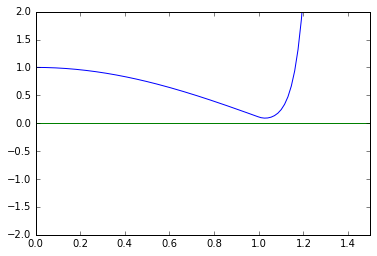

In [24]:
result = odeint(func, y0, x, args=(-19.91875,))
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.5)
plt.ylim(-2,2)
plt.plot(x,np.zeros_like(x))

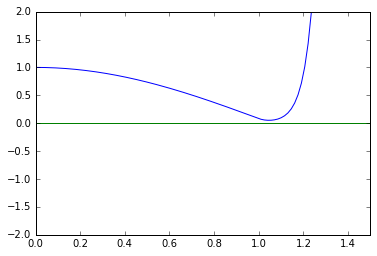

In [25]:
result = odeint(func, y0, x, args=(-19.915625,))
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.5)
plt.ylim(-2,2)
plt.plot(x,np.zeros_like(x))

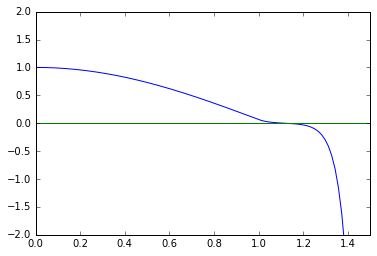

In [27]:
result = odeint(func, y0, x, args=(-19.9135625,))
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.5)
plt.ylim(-2,2)
plt.plot(x,np.zeros_like(x))

We're getting there, but this will take a long time if I have to do it by hand. Let's automate.

In [36]:
def bisect(func, E1, E2, a=1, even=True):
    """Given two ends of an energy interval, chop it in half."""
    
    x = np.linspace(0, 2*a, 200)
    
    if even:
        y0 = (1.0, 0.0)
    else:
        y0 = (0.0, 1.0)
        
    # get initial signs
    res1 = odeint(func, y0, x, args=(E1,))
    psi1 = res1[-1,0]
    
    res2 = odeint(func, y0, x, args=(E2,))
    psi2 = res2[-1,0]
    
    Ehalf = (E1+E2)/2
    reshalf = odeint(func, y0, x, args=(Ehalf,))
    psihalf = reshalf[-1, 0]
    
    if np.sign(psihalf) == np.sign(psi1):
        return (Ehalf, E2)
    else:
        return (E1, Ehalf)
    

def find_energy(func, a, E1, E2, even=True):
    
    while abs(E1-E2) > 1.0e-14:
        E1, E2 = bisect(func, E1, E2, a, even)
        
    if even:
        y0 = (1.0, 0.0)
    else:
        y0 = (0.0, 1.0)

    x = np.linspace(0, 2*a, 200)
    result = odeint(func, y0, x, args=(E1, ))
    psi = result[:,0]
    plt.plot(x, psi)
    plt.ylim(-1.1, 1.1)
    plt.xlim(0, 1.5*a)
    
    return E1

-19.91363515874734

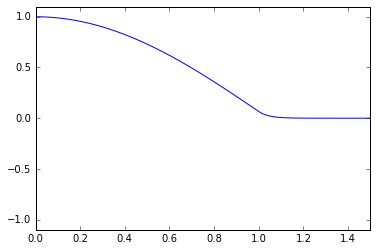

In [37]:
find_energy(func, 1.0, -19.915625, -19.9135625)

Beautiful.

Let's find the first odd one.

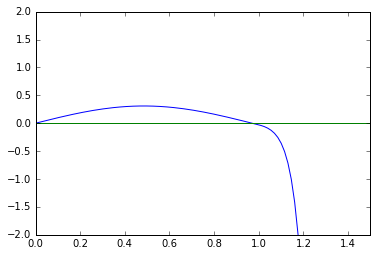

In [41]:
y0 = (0.0, 1.0)

result = odeint(func, y0, x, args=(-19.6,))
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.5)
plt.ylim(-2,2)
plt.plot(x,np.zeros_like(x))

-19.654603647999515

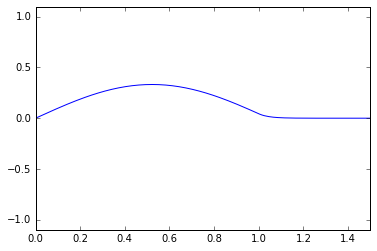

In [42]:
find_energy(func, 1.0, -19.6, -19.7, even=False)

What happens if we start with a bigger range?

-19.654603647999515

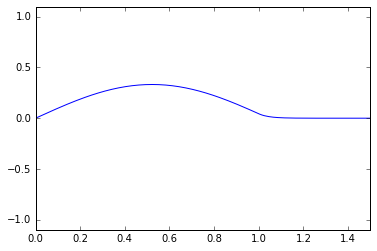

In [43]:
find_energy(func, 1.0, -19.5, -19.9, even=False)

We have now addressed the second part of the shooting method: improving our guess based on an initial (pair, in this case) guess.  This approach is called the *bisection method* for finding roots, and it is both stable and fast, assuming you can find guesses that bracket the true value. 

There are methods for working with a single guess (which you could use to get a pair of bracketing values to feed into a bisection algorithm), but I'm not going to cover them here.

Hopefully this is enough information to get you started.